In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
sns.set_style('darkgrid')


def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

In [3]:
df=pd.read_csv('adult.csv')

In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
resumetable(df)

Dataset Shape: (48842, 15)


,Name,dtypes,Missing,Uniques
0,age,int64,0,74
1,workclass,object,0,9
2,fnlwgt,int64,0,28523
3,education,object,0,16
4,educational-num,int64,0,16
5,marital-status,object,0,7
6,occupation,object,0,15
7,relationship,object,0,6
8,race,object,0,5
9,gender,object,0,2


In [6]:
df[df['workclass']=='?']
df['workclass']=np.where(df['workclass']=='?',np.nan,df['workclass'])
df['occupation']=np.where(df['occupation']=='?',np.nan,df['occupation'])

In [8]:
for i in df.columns:
    df[i]=np.where(df[i]=='?',np.nan,df[i])
resumetable(df)

Dataset Shape: (48842, 15)


,Name,dtypes,Missing,Uniques
0,age,float64,0,74
1,workclass,object,2799,8
2,fnlwgt,float64,0,28523
3,education,object,0,16
4,educational-num,float64,0,16
5,marital-status,object,0,7
6,occupation,object,2809,14
7,relationship,object,0,6
8,race,object,0,5
9,gender,object,0,2


In [9]:
df_1=df.dropna()
resumetable(df_1)

Dataset Shape: (45222, 15)


,Name,dtypes,Missing,Uniques
0,age,float64,0,74
1,workclass,object,0,7
2,fnlwgt,float64,0,26741
3,education,object,0,16
4,educational-num,float64,0,16
5,marital-status,object,0,7
6,occupation,object,0,14
7,relationship,object,0,6
8,race,object,0,5
9,gender,object,0,2


### Which workerclass has highest number of income above 50K & Below 50K

In [ ]:
px.histogram(df_1, x='workclass', color="income", barmode='group',title='Worker Class vs Income')

<AxesSubplot:xlabel='workclass', ylabel='count'>

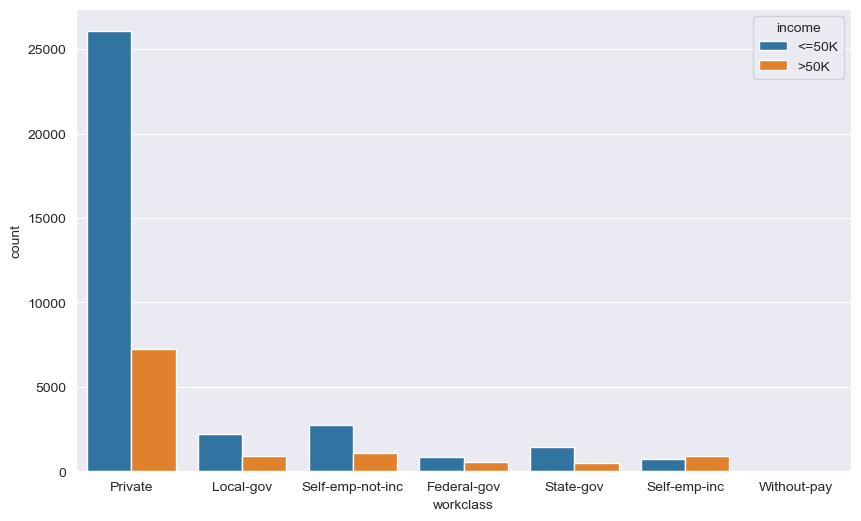

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1,x='workclass', hue="income",)
#plt.xticks(rotation=45)  

#### Conclusion

Private & Private

### What level of education has highest number of income above 50K & Below 50K

In [ ]:
df_1_sorted_edu = df_1.sort_values('education')
px.histogram(df_1_sorted_edu, x='education', color="income", barmode='group',title='Education VS Income')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '10th'),
  Text(1, 0, '11th'),
  Text(2, 0, '12th'),
  Text(3, 0, '1st-4th'),
  Text(4, 0, '5th-6th'),
  Text(5, 0, '7th-8th'),
  Text(6, 0, '9th'),
  Text(7, 0, 'Assoc-acdm'),
  Text(8, 0, 'Assoc-voc'),
  Text(9, 0, 'Bachelors'),
  Text(10, 0, 'Doctorate'),
  Text(11, 0, 'HS-grad'),
  Text(12, 0, 'Masters'),
  Text(13, 0, 'Preschool'),
  Text(14, 0, 'Prof-school'),
  Text(15, 0, 'Some-college')])

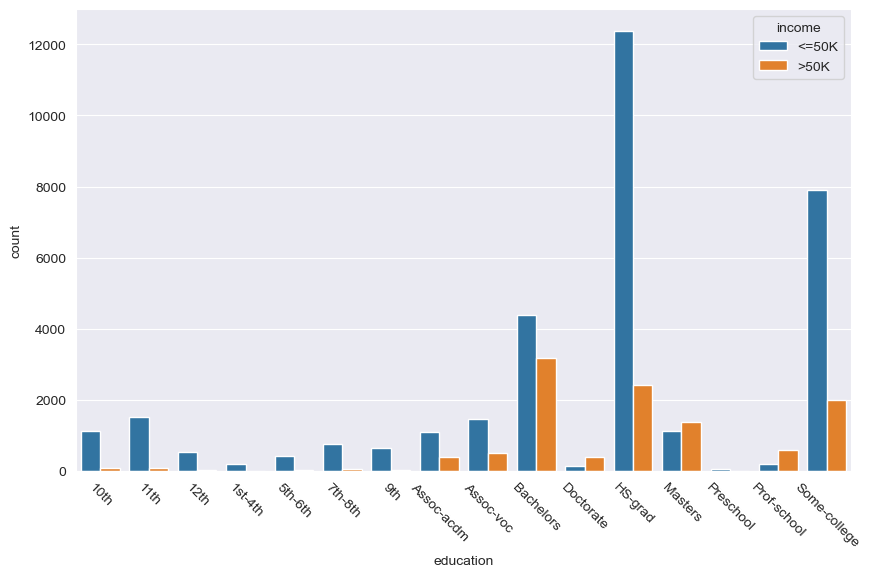

In [12]:
df_1_sorted_edu = df_1.sort_values('education')
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1_sorted_edu,x='education', hue="income",)
plt.xticks(rotation=-45)  

In [ ]:
px.histogram(df_1, x='occupation', color="income", barmode='group')

<AxesSubplot:xlabel='count', ylabel='occupation'>

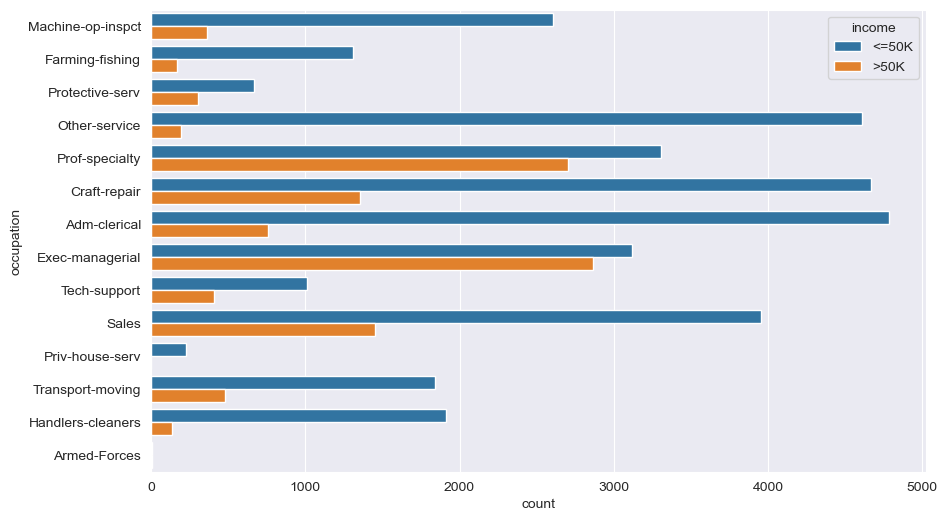

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1,y='occupation', hue="income",)
#plt.xticks(rotation=-90)  

### Does Number of hours per week worked have an impact on income

In [ ]:
fig = px.box(df_1, x='hours-per-week', y='income',color='income' )
fig.show()

<AxesSubplot:xlabel='hours-per-week', ylabel='income'>

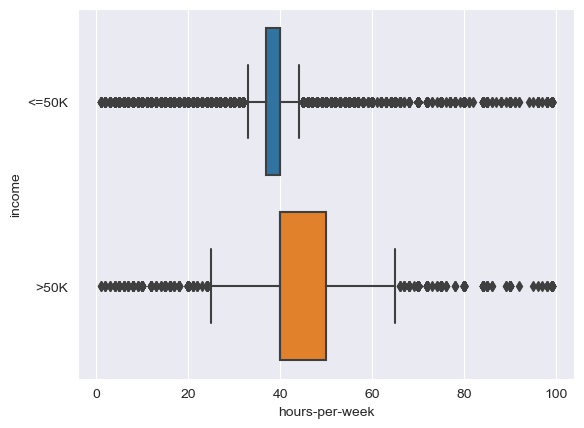

In [14]:
#plt.figure(figsize=(10, 6))
sns.boxplot(data=df_1,x='hours-per-week', y="income",)
#plt.xticks(rotation=-45)  

In [ ]:
fig = px.strip(df_1, y='hours-per-week', x='income',color='income' )
fig.show()

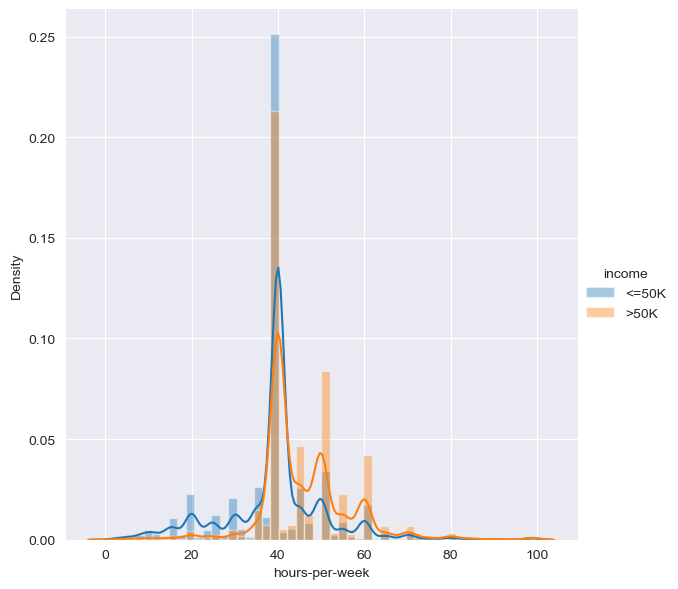

In [15]:
a=sns.FacetGrid(df_1,hue='income', height=6)
a.map(sns.distplot,'hours-per-week')
a.add_legend()

In [ ]:
df_1_sorted_mar = df_1.sort_values('marital-status')
px.histogram(df_1_sorted_mar, x='marital-status', color="income", barmode='group',title='Marital Status VS Income')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Divorced'),
  Text(1, 0, 'Married-AF-spouse'),
  Text(2, 0, 'Married-civ-spouse'),
  Text(3, 0, 'Married-spouse-absent'),
  Text(4, 0, 'Never-married'),
  Text(5, 0, 'Separated'),
  Text(6, 0, 'Widowed')])

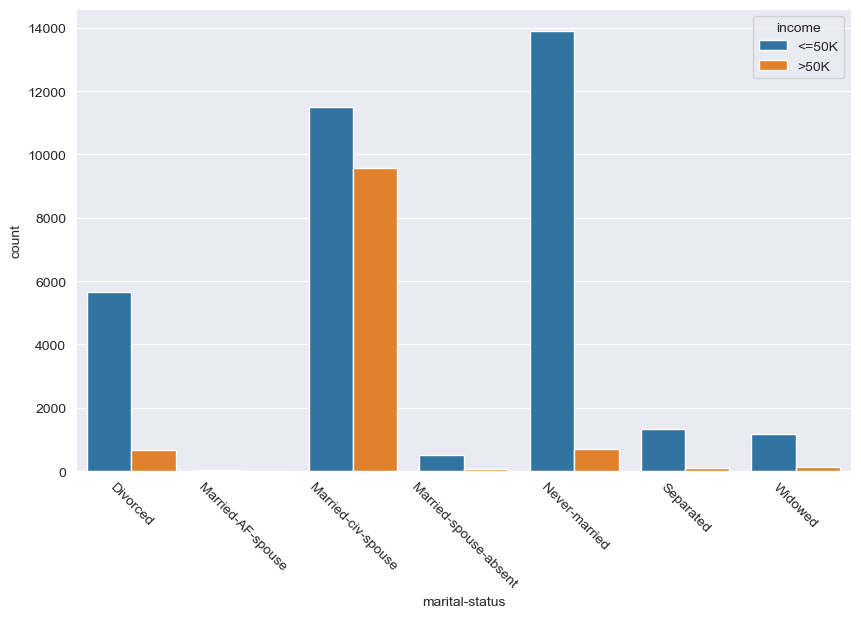

In [17]:
plt.figure(figsize=(10, 6))
df_1_sorted_mar = df_1.sort_values('marital-status')
sns.countplot(data=df_1_sorted_mar, x='marital-status',hue='income')
plt.xticks(rotation=-45)  

In [ ]:

df_1_sorted_rel = df_1.sort_values('relationship')
px.histogram(df_1_sorted_rel, x='relationship', color="income", barmode='group',title='relationship VS Income')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Husband'),
  Text(1, 0, 'Not-in-family'),
  Text(2, 0, 'Other-relative'),
  Text(3, 0, 'Own-child'),
  Text(4, 0, 'Unmarried'),
  Text(5, 0, 'Wife')])

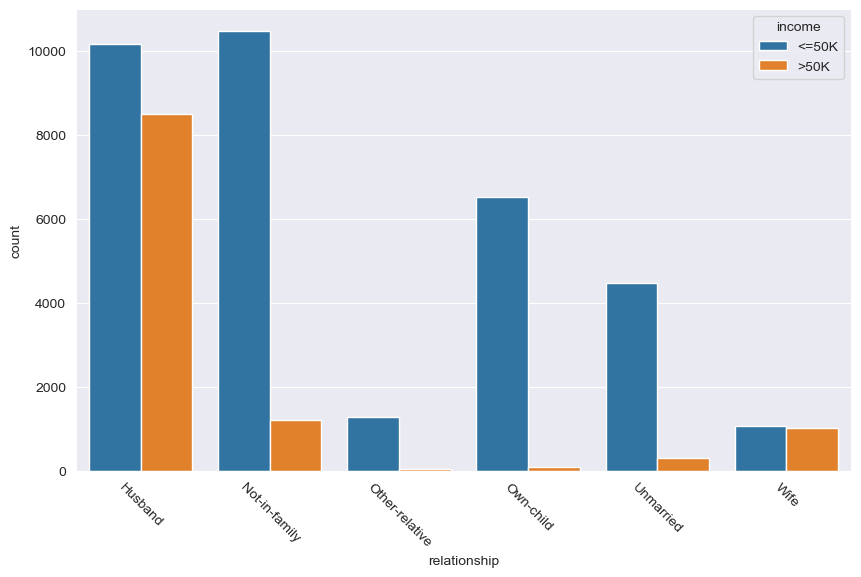

In [18]:
plt.figure(figsize=(10, 6))
df_1_sorted_mar = df_1.sort_values('relationship')
sns.countplot(data=df_1_sorted_mar, x='relationship',hue='income')
plt.xticks(rotation=-45)  

In [ ]:

df_1_sorted_race = df_1.sort_values('race')
px.histogram(df_1_sorted_rel, x='race', color="income", barmode='group',title='race VS Income')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Amer-Indian-Eskimo'),
  Text(1, 0, 'Asian-Pac-Islander'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'White')])

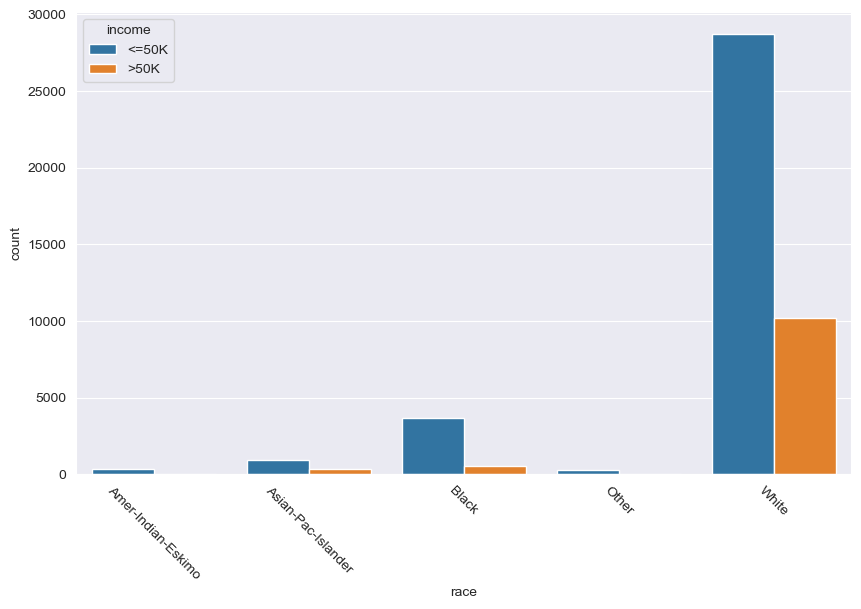

In [19]:
plt.figure(figsize=(10, 6))
df_1_sorted_mar = df_1.sort_values('race')
sns.countplot(data=df_1_sorted_mar, x='race',hue='income')
plt.xticks(rotation=-45)  

In [ ]:
fig = px.strip(df_1, y='capital-gain', x='income',color='income' )
fig.show()

In [ ]:
df_1['occupation'].value_counts()